In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)


In [1]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

2.5.0-dev20201214


In [2]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Shuffling and writing examples to C:\/Users/dipesh/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete97CE5D/imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\/Users/dipesh/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete97CE5D/imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\/Users/dipesh/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete97CE5D/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\dipesh\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [6]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [7]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [9]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10


224/391 [================>.............] - ETA: 5:48 - loss: 0.6962 - accuracy: 0.48 - ETA: 28s - loss: 0.6946 - accuracy: 0.5078 - ETA: 18s - loss: 0.6943 - accuracy: 0.505 - ETA: 19s - loss: 0.6944 - accuracy: 0.501 - ETA: 19s - loss: 0.6944 - accuracy: 0.500 - ETA: 20s - loss: 0.6943 - accuracy: 0.500 - ETA: 19s - loss: 0.6943 - accuracy: 0.496 - ETA: 19s - loss: 0.6943 - accuracy: 0.496 - ETA: 19s - loss: 0.6943 - accuracy: 0.494 - ETA: 19s - loss: 0.6943 - accuracy: 0.493 - ETA: 20s - loss: 0.6943 - accuracy: 0.492 - ETA: 19s - loss: 0.6943 - accuracy: 0.491 - ETA: 19s - loss: 0.6943 - accuracy: 0.490 - ETA: 19s - loss: 0.6943 - accuracy: 0.490 - ETA: 20s - loss: 0.6943 - accuracy: 0.491 - ETA: 20s - loss: 0.6942 - accuracy: 0.491 - ETA: 19s - loss: 0.6942 - accuracy: 0.493 - ETA: 19s - loss: 0.6942 - accuracy: 0.494 - ETA: 19s - loss: 0.6942 - accuracy: 0.495 - ETA: 19s - loss: 0.6941 - accuracy: 0.495 - ETA: 19s - loss: 0.6941 - accuracy: 0.496 - ETA: 19s - loss: 0.6941 - accura

222/391 [================>.............] - ETA: 37s - loss: 0.6229 - accuracy: 0.734 - ETA: 24s - loss: 0.6229 - accuracy: 0.718 - ETA: 23s - loss: 0.6217 - accuracy: 0.720 - ETA: 23s - loss: 0.6194 - accuracy: 0.729 - ETA: 23s - loss: 0.6189 - accuracy: 0.730 - ETA: 23s - loss: 0.6187 - accuracy: 0.730 - ETA: 21s - loss: 0.6183 - accuracy: 0.732 - ETA: 21s - loss: 0.6180 - accuracy: 0.734 - ETA: 21s - loss: 0.6177 - accuracy: 0.736 - ETA: 22s - loss: 0.6175 - accuracy: 0.738 - ETA: 22s - loss: 0.6174 - accuracy: 0.739 - ETA: 21s - loss: 0.6165 - accuracy: 0.742 - ETA: 21s - loss: 0.6161 - accuracy: 0.742 - ETA: 21s - loss: 0.6158 - accuracy: 0.743 - ETA: 22s - loss: 0.6154 - accuracy: 0.744 - ETA: 22s - loss: 0.6152 - accuracy: 0.745 - ETA: 22s - loss: 0.6149 - accuracy: 0.745 - ETA: 22s - loss: 0.6148 - accuracy: 0.746 - ETA: 22s - loss: 0.6147 - accuracy: 0.746 - ETA: 22s - loss: 0.6144 - accuracy: 0.747 - ETA: 22s - loss: 0.6142 - accuracy: 0.747 - ETA: 22s - loss: 0.6140 - accurac

391/391 [==============================] - ETA: 9s - loss: 0.5773 - accuracy: 0.77 - ETA: 9s - loss: 0.5771 - accuracy: 0.77 - ETA: 9s - loss: 0.5768 - accuracy: 0.77 - ETA: 9s - loss: 0.5766 - accuracy: 0.77 - ETA: 9s - loss: 0.5764 - accuracy: 0.77 - ETA: 9s - loss: 0.5763 - accuracy: 0.77 - ETA: 9s - loss: 0.5759 - accuracy: 0.77 - ETA: 9s - loss: 0.5758 - accuracy: 0.77 - ETA: 9s - loss: 0.5756 - accuracy: 0.77 - ETA: 9s - loss: 0.5754 - accuracy: 0.77 - ETA: 9s - loss: 0.5753 - accuracy: 0.77 - ETA: 9s - loss: 0.5751 - accuracy: 0.77 - ETA: 9s - loss: 0.5750 - accuracy: 0.77 - ETA: 8s - loss: 0.5746 - accuracy: 0.77 - ETA: 8s - loss: 0.5745 - accuracy: 0.77 - ETA: 8s - loss: 0.5743 - accuracy: 0.77 - ETA: 8s - loss: 0.5742 - accuracy: 0.77 - ETA: 8s - loss: 0.5738 - accuracy: 0.77 - ETA: 8s - loss: 0.5735 - accuracy: 0.77 - ETA: 8s - loss: 0.5734 - accuracy: 0.77 - ETA: 8s - loss: 0.5730 - accuracy: 0.77 - ETA: 8s - loss: 0.5727 - accuracy: 0.77 - ETA: 8s - loss: 0.5726 - accuracy

286/391 [====================>.........] - ETA: 35s - loss: 0.4006 - accuracy: 0.890 - ETA: 17s - loss: 0.4150 - accuracy: 0.862 - ETA: 18s - loss: 0.4138 - accuracy: 0.857 - ETA: 18s - loss: 0.4139 - accuracy: 0.855 - ETA: 18s - loss: 0.4127 - accuracy: 0.855 - ETA: 19s - loss: 0.4090 - accuracy: 0.856 - ETA: 18s - loss: 0.4077 - accuracy: 0.857 - ETA: 18s - loss: 0.4046 - accuracy: 0.858 - ETA: 18s - loss: 0.4027 - accuracy: 0.858 - ETA: 17s - loss: 0.4011 - accuracy: 0.858 - ETA: 18s - loss: 0.4007 - accuracy: 0.858 - ETA: 18s - loss: 0.4003 - accuracy: 0.857 - ETA: 17s - loss: 0.3991 - accuracy: 0.857 - ETA: 17s - loss: 0.3979 - accuracy: 0.857 - ETA: 17s - loss: 0.3973 - accuracy: 0.857 - ETA: 17s - loss: 0.3968 - accuracy: 0.857 - ETA: 17s - loss: 0.3957 - accuracy: 0.858 - ETA: 17s - loss: 0.3952 - accuracy: 0.858 - ETA: 17s - loss: 0.3941 - accuracy: 0.859 - ETA: 17s - loss: 0.3936 - accuracy: 0.859 - ETA: 17s - loss: 0.3929 - accuracy: 0.859 - ETA: 17s - loss: 0.3925 - accurac

274/391 [====================>.........] - ETA: 30s - loss: 0.2780 - accuracy: 0.890 - ETA: 19s - loss: 0.2947 - accuracy: 0.898 - ETA: 19s - loss: 0.2898 - accuracy: 0.902 - ETA: 16s - loss: 0.2880 - accuracy: 0.902 - ETA: 18s - loss: 0.2883 - accuracy: 0.902 - ETA: 18s - loss: 0.2885 - accuracy: 0.902 - ETA: 19s - loss: 0.2884 - accuracy: 0.902 - ETA: 18s - loss: 0.2874 - accuracy: 0.904 - ETA: 18s - loss: 0.2870 - accuracy: 0.904 - ETA: 19s - loss: 0.2858 - accuracy: 0.906 - ETA: 19s - loss: 0.2857 - accuracy: 0.906 - ETA: 22s - loss: 0.2864 - accuracy: 0.906 - ETA: 21s - loss: 0.2870 - accuracy: 0.906 - ETA: 21s - loss: 0.2874 - accuracy: 0.905 - ETA: 21s - loss: 0.2877 - accuracy: 0.905 - ETA: 21s - loss: 0.2877 - accuracy: 0.905 - ETA: 21s - loss: 0.2876 - accuracy: 0.905 - ETA: 20s - loss: 0.2874 - accuracy: 0.905 - ETA: 20s - loss: 0.2871 - accuracy: 0.905 - ETA: 19s - loss: 0.2867 - accuracy: 0.905 - ETA: 19s - loss: 0.2865 - accuracy: 0.905 - ETA: 19s - loss: 0.2864 - accurac

391/391 [==============================] - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 5s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2829 - accuracy: 0.90 - ETA: 4s - loss: 0.2828 - accuracy: 0.90 - ETA: 4s - loss: 0.2828 - accuracy: 0.90 - ETA: 3s - loss: 0.2828 - accuracy

281/391 [====================>.........] - ETA: 34s - loss: 0.3506 - accuracy: 0.890 - ETA: 17s - loss: 0.3284 - accuracy: 0.902 - ETA: 17s - loss: 0.3211 - accuracy: 0.901 - ETA: 20s - loss: 0.3188 - accuracy: 0.900 - ETA: 19s - loss: 0.3110 - accuracy: 0.902 - ETA: 19s - loss: 0.3047 - accuracy: 0.902 - ETA: 18s - loss: 0.2987 - accuracy: 0.903 - ETA: 19s - loss: 0.2957 - accuracy: 0.904 - ETA: 19s - loss: 0.2932 - accuracy: 0.904 - ETA: 19s - loss: 0.2909 - accuracy: 0.905 - ETA: 19s - loss: 0.2887 - accuracy: 0.906 - ETA: 19s - loss: 0.2871 - accuracy: 0.906 - ETA: 18s - loss: 0.2837 - accuracy: 0.906 - ETA: 18s - loss: 0.2802 - accuracy: 0.907 - ETA: 18s - loss: 0.2785 - accuracy: 0.908 - ETA: 17s - loss: 0.2753 - accuracy: 0.909 - ETA: 17s - loss: 0.2740 - accuracy: 0.909 - ETA: 17s - loss: 0.2717 - accuracy: 0.909 - ETA: 17s - loss: 0.2708 - accuracy: 0.909 - ETA: 17s - loss: 0.2698 - accuracy: 0.909 - ETA: 17s - loss: 0.2690 - accuracy: 0.909 - ETA: 17s - loss: 0.2675 - accurac

253/391 [==================>...........] - ETA: 31s - loss: 0.1107 - accuracy: 0.984 - ETA: 18s - loss: 0.1427 - accuracy: 0.963 - ETA: 17s - loss: 0.1706 - accuracy: 0.953 - ETA: 17s - loss: 0.1844 - accuracy: 0.946 - ETA: 17s - loss: 0.1903 - accuracy: 0.943 - ETA: 17s - loss: 0.1946 - accuracy: 0.941 - ETA: 17s - loss: 0.1997 - accuracy: 0.938 - ETA: 17s - loss: 0.2027 - accuracy: 0.936 - ETA: 17s - loss: 0.2038 - accuracy: 0.935 - ETA: 17s - loss: 0.2046 - accuracy: 0.934 - ETA: 17s - loss: 0.2054 - accuracy: 0.933 - ETA: 18s - loss: 0.2060 - accuracy: 0.933 - ETA: 17s - loss: 0.2064 - accuracy: 0.932 - ETA: 17s - loss: 0.2067 - accuracy: 0.932 - ETA: 17s - loss: 0.2068 - accuracy: 0.932 - ETA: 17s - loss: 0.2069 - accuracy: 0.932 - ETA: 17s - loss: 0.2070 - accuracy: 0.931 - ETA: 17s - loss: 0.2071 - accuracy: 0.931 - ETA: 18s - loss: 0.2073 - accuracy: 0.931 - ETA: 18s - loss: 0.2075 - accuracy: 0.931 - ETA: 18s - loss: 0.2077 - accuracy: 0.931 - ETA: 18s - loss: 0.2078 - accurac

391/391 [==============================] - ETA: 7s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 6s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2218 - accuracy: 0.92 - ETA: 5s - loss: 0.2217 - accuracy: 0.92 - ETA: 5s - loss: 0.2217 - accuracy: 0.92 - ETA: 5s - loss: 0.2217 - accuracy: 0.92 - ETA: 5s - loss: 0.2217 - accuracy

263/391 [===================>..........] - ETA: 34s - loss: 0.3029 - accuracy: 0.906 - ETA: 15s - loss: 0.2595 - accuracy: 0.908 - ETA: 17s - loss: 0.2516 - accuracy: 0.909 - ETA: 18s - loss: 0.2498 - accuracy: 0.908 - ETA: 19s - loss: 0.2442 - accuracy: 0.909 - ETA: 19s - loss: 0.2413 - accuracy: 0.910 - ETA: 18s - loss: 0.2393 - accuracy: 0.911 - ETA: 18s - loss: 0.2383 - accuracy: 0.911 - ETA: 18s - loss: 0.2366 - accuracy: 0.912 - ETA: 19s - loss: 0.2352 - accuracy: 0.913 - ETA: 19s - loss: 0.2339 - accuracy: 0.914 - ETA: 19s - loss: 0.2323 - accuracy: 0.914 - ETA: 19s - loss: 0.2309 - accuracy: 0.915 - ETA: 18s - loss: 0.2287 - accuracy: 0.915 - ETA: 19s - loss: 0.2279 - accuracy: 0.915 - ETA: 18s - loss: 0.2260 - accuracy: 0.915 - ETA: 18s - loss: 0.2243 - accuracy: 0.916 - ETA: 17s - loss: 0.2230 - accuracy: 0.916 - ETA: 17s - loss: 0.2218 - accuracy: 0.916 - ETA: 18s - loss: 0.2213 - accuracy: 0.917 - ETA: 17s - loss: 0.2201 - accuracy: 0.917 - ETA: 17s - loss: 0.2195 - accurac

268/391 [===================>..........] - ETA: 28s - loss: 0.1453 - accuracy: 0.968 - ETA: 23s - loss: 0.1431 - accuracy: 0.972 - ETA: 21s - loss: 0.1415 - accuracy: 0.971 - ETA: 21s - loss: 0.1460 - accuracy: 0.969 - ETA: 19s - loss: 0.1496 - accuracy: 0.968 - ETA: 21s - loss: 0.1530 - accuracy: 0.966 - ETA: 21s - loss: 0.1598 - accuracy: 0.963 - ETA: 21s - loss: 0.1650 - accuracy: 0.960 - ETA: 21s - loss: 0.1686 - accuracy: 0.958 - ETA: 22s - loss: 0.1719 - accuracy: 0.956 - ETA: 22s - loss: 0.1745 - accuracy: 0.955 - ETA: 22s - loss: 0.1765 - accuracy: 0.953 - ETA: 22s - loss: 0.1778 - accuracy: 0.952 - ETA: 21s - loss: 0.1798 - accuracy: 0.951 - ETA: 21s - loss: 0.1804 - accuracy: 0.950 - ETA: 20s - loss: 0.1816 - accuracy: 0.949 - ETA: 20s - loss: 0.1826 - accuracy: 0.948 - ETA: 20s - loss: 0.1831 - accuracy: 0.947 - ETA: 19s - loss: 0.1841 - accuracy: 0.946 - ETA: 19s - loss: 0.1845 - accuracy: 0.946 - ETA: 19s - loss: 0.1854 - accuracy: 0.945 - ETA: 19s - loss: 0.1861 - accurac

391/391 [==============================] - ETA: 6s - loss: 0.1928 - accuracy: 0.93 - ETA: 6s - loss: 0.1928 - accuracy: 0.93 - ETA: 6s - loss: 0.1927 - accuracy: 0.93 - ETA: 5s - loss: 0.1927 - accuracy: 0.93 - ETA: 5s - loss: 0.1927 - accuracy: 0.93 - ETA: 5s - loss: 0.1926 - accuracy: 0.93 - ETA: 5s - loss: 0.1926 - accuracy: 0.93 - ETA: 5s - loss: 0.1926 - accuracy: 0.93 - ETA: 5s - loss: 0.1926 - accuracy: 0.93 - ETA: 5s - loss: 0.1925 - accuracy: 0.93 - ETA: 5s - loss: 0.1925 - accuracy: 0.93 - ETA: 5s - loss: 0.1925 - accuracy: 0.93 - ETA: 5s - loss: 0.1925 - accuracy: 0.93 - ETA: 5s - loss: 0.1925 - accuracy: 0.93 - ETA: 5s - loss: 0.1924 - accuracy: 0.93 - ETA: 5s - loss: 0.1924 - accuracy: 0.93 - ETA: 5s - loss: 0.1924 - accuracy: 0.93 - ETA: 5s - loss: 0.1924 - accuracy: 0.93 - ETA: 5s - loss: 0.1924 - accuracy: 0.93 - ETA: 4s - loss: 0.1923 - accuracy: 0.93 - ETA: 4s - loss: 0.1923 - accuracy: 0.93 - ETA: 4s - loss: 0.1923 - accuracy: 0.93 - ETA: 4s - loss: 0.1923 - accuracy

262/391 [===================>..........] - ETA: 37s - loss: 0.1766 - accuracy: 0.953 - ETA: 17s - loss: 0.1646 - accuracy: 0.951 - ETA: 19s - loss: 0.1631 - accuracy: 0.952 - ETA: 19s - loss: 0.1639 - accuracy: 0.952 - ETA: 19s - loss: 0.1650 - accuracy: 0.951 - ETA: 20s - loss: 0.1660 - accuracy: 0.949 - ETA: 19s - loss: 0.1665 - accuracy: 0.948 - ETA: 19s - loss: 0.1679 - accuracy: 0.948 - ETA: 19s - loss: 0.1692 - accuracy: 0.946 - ETA: 19s - loss: 0.1694 - accuracy: 0.946 - ETA: 19s - loss: 0.1697 - accuracy: 0.946 - ETA: 19s - loss: 0.1698 - accuracy: 0.945 - ETA: 19s - loss: 0.1698 - accuracy: 0.944 - ETA: 19s - loss: 0.1696 - accuracy: 0.944 - ETA: 19s - loss: 0.1696 - accuracy: 0.944 - ETA: 19s - loss: 0.1696 - accuracy: 0.944 - ETA: 19s - loss: 0.1696 - accuracy: 0.943 - ETA: 19s - loss: 0.1699 - accuracy: 0.942 - ETA: 19s - loss: 0.1701 - accuracy: 0.942 - ETA: 19s - loss: 0.1702 - accuracy: 0.942 - ETA: 19s - loss: 0.1707 - accuracy: 0.941 - ETA: 19s - loss: 0.1708 - accurac

264/391 [===================>..........] - ETA: 29s - loss: 0.2233 - accuracy: 0.937 - ETA: 19s - loss: 0.2016 - accuracy: 0.932 - ETA: 18s - loss: 0.1938 - accuracy: 0.930 - ETA: 18s - loss: 0.1879 - accuracy: 0.932 - ETA: 18s - loss: 0.1852 - accuracy: 0.933 - ETA: 18s - loss: 0.1833 - accuracy: 0.932 - ETA: 18s - loss: 0.1821 - accuracy: 0.933 - ETA: 18s - loss: 0.1809 - accuracy: 0.933 - ETA: 18s - loss: 0.1807 - accuracy: 0.933 - ETA: 19s - loss: 0.1811 - accuracy: 0.933 - ETA: 18s - loss: 0.1815 - accuracy: 0.933 - ETA: 18s - loss: 0.1819 - accuracy: 0.933 - ETA: 18s - loss: 0.1821 - accuracy: 0.933 - ETA: 18s - loss: 0.1820 - accuracy: 0.933 - ETA: 18s - loss: 0.1814 - accuracy: 0.933 - ETA: 18s - loss: 0.1810 - accuracy: 0.933 - ETA: 18s - loss: 0.1797 - accuracy: 0.934 - ETA: 18s - loss: 0.1785 - accuracy: 0.935 - ETA: 18s - loss: 0.1779 - accuracy: 0.935 - ETA: 17s - loss: 0.1768 - accuracy: 0.935 - ETA: 17s - loss: 0.1762 - accuracy: 0.936 - ETA: 17s - loss: 0.1759 - accurac

391/391 [==============================] - ETA: 6s - loss: 0.1656 - accuracy: 0.94 - ETA: 6s - loss: 0.1655 - accuracy: 0.94 - ETA: 6s - loss: 0.1655 - accuracy: 0.94 - ETA: 6s - loss: 0.1655 - accuracy: 0.94 - ETA: 6s - loss: 0.1655 - accuracy: 0.94 - ETA: 6s - loss: 0.1655 - accuracy: 0.94 - ETA: 5s - loss: 0.1654 - accuracy: 0.94 - ETA: 5s - loss: 0.1654 - accuracy: 0.94 - ETA: 5s - loss: 0.1654 - accuracy: 0.94 - ETA: 5s - loss: 0.1653 - accuracy: 0.94 - ETA: 5s - loss: 0.1653 - accuracy: 0.94 - ETA: 5s - loss: 0.1653 - accuracy: 0.94 - ETA: 5s - loss: 0.1652 - accuracy: 0.94 - ETA: 5s - loss: 0.1652 - accuracy: 0.94 - ETA: 5s - loss: 0.1652 - accuracy: 0.94 - ETA: 5s - loss: 0.1652 - accuracy: 0.94 - ETA: 5s - loss: 0.1651 - accuracy: 0.94 - ETA: 4s - loss: 0.1651 - accuracy: 0.94 - ETA: 4s - loss: 0.1651 - accuracy: 0.94 - ETA: 4s - loss: 0.1651 - accuracy: 0.94 - ETA: 4s - loss: 0.1650 - accuracy: 0.94 - ETA: 4s - loss: 0.1650 - accuracy: 0.94 - ETA: 4s - loss: 0.1650 - accuracy

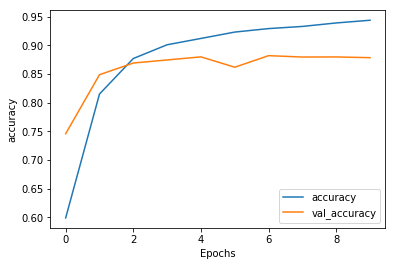

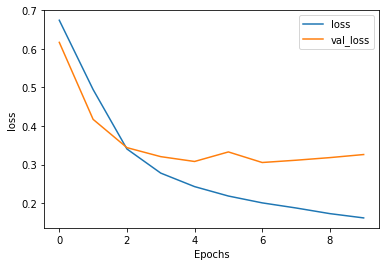

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)
